#**DQN autonomous ship path planning**#

#**My own gridworld environment**#

In [0]:
"""
class Gridworld:
    states = None
    initial_state = None
    goal_state = None
    moving = None

    def __init__(self, filename):
        self.moving = False
        with open(filename) as file:
            self.states = [list(line) for line in file.read().splitlines()]
            for y, line in enumerate(self.states):
                for x, value in enumerate(line):
                    if value.isnumeric():
                        line[x] = int(value)
                    if value == 's':
                        self.initial_state = (x, y)
                    if value == 'g':
                        self.goal_state = (x, y)

    def successors(self, state):
        # TODO
        l = []
        x = state[0]
        y = state[1]
        if(x-1>=0 and self.states[y][x-1]!='#'):
            l.append((x-1,y))
        if(y-1>=0 and self.states[y-1][x]!='#'):
            l.append((x,y-1))
        if(x+1<len(self.states[0]) and self.states[y][x+1]!='#'):
            l.append((x+1,y))
        if(y+1<len(self.states) and self.states[y+1][x]!='#'):
           l.append((x,y+1))
        return l

    def cost(self, state):
        if(state==self.goal_state or state== self.initial_state):
            return 1
        return self.states[state[1]][state[0]]

    def set_move(self,move):
        self.moving=move
"""

"\nclass Gridworld:\n    states = None\n    initial_state = None\n    goal_state = None\n    moving = None\n\n    def __init__(self, filename):\n        self.moving = False\n        with open(filename) as file:\n            self.states = [list(line) for line in file.read().splitlines()]\n            for y, line in enumerate(self.states):\n                for x, value in enumerate(line):\n                    if value.isnumeric():\n                        line[x] = int(value)\n                    if value == 's':\n                        self.initial_state = (x, y)\n                    if value == 'g':\n                        self.goal_state = (x, y)\n\n    def successors(self, state):\n        # TODO\n        l = []\n        x = state[0]\n        y = state[1]\n        if(x-1>=0 and self.states[y][x-1]!='#'):\n            l.append((x-1,y))\n        if(y-1>=0 and self.states[y-1][x]!='#'):\n            l.append((x,y-1))\n        if(x+1<len(self.states[0]) and self.states[y][x+1]!='#'):\n

#**Generate valid data**#

In [0]:
"""
import argparse
from assignment1.agents import AStar, BFS, RandomSearch, GBFS, UCS
from assignment1.gridworld import Gridworld
import random
import os

agents = {
    "astar": AStar,
    "bfs": BFS,
    "gbfs": GBFS,
    "ucs": UCS,
    "random": RandomSearch
}

def run():
    # Parse command line arguments.
    parser = argparse.ArgumentParser(
        description='Run the given agent algorithm on the given gridworld.')
    parser.add_argument(
        'agent', help='The agent, one of: [astar, bfs, random]')
    args = parser.parse_args()

    # Create the agent and gridworld,
    # and run the search.
    agent = agents[args.agent]()
    def create_world(p,rate):
        gworld = []
        for i in range(p):
            row = []
            for j in range(p):
                if i == 0 and j == 0:
                    row.append('s')
                elif i==p-1 and j==p-1:
                    row.append('g')
                else:
                    rand = random.random()
                    if rand<rate:
                        row.append('#')
                    else:
                        row.append('1')
            gworld.append("".join(row))
        return gworld

    # Print the results.
    for p in range(100):
        solution=[]
        while len(solution)<=1:
            gw = create_world(10,0.2)
            print(gw)
            filepath="gw/"+str(p)+".txt"
            file = open(filepath,'w')
            for i in range(len(gw)): 
                file.write(gw[i]+os.linesep)
            file.close()
            gridworld = Gridworld(filepath)
            solution, cost, nodes_expanded = agent.search(gridworld)


    print('solution', solution)
    print('cost', cost)
    print('nodes_expanded', nodes_expanded)


if __name__ == '__main__':
    run()
"""

'\nimport argparse\nfrom assignment1.agents import AStar, BFS, RandomSearch, GBFS, UCS\nfrom assignment1.gridworld import Gridworld\nimport random\nimport os\n\nagents = {\n    "astar": AStar,\n    "bfs": BFS,\n    "gbfs": GBFS,\n    "ucs": UCS,\n    "random": RandomSearch\n}\n\ndef run():\n    # Parse command line arguments.\n    parser = argparse.ArgumentParser(\n        description=\'Run the given agent algorithm on the given gridworld.\')\n    parser.add_argument(\n        \'agent\', help=\'The agent, one of: [astar, bfs, random]\')\n    args = parser.parse_args()\n\n    # Create the agent and gridworld,\n    # and run the search.\n    agent = agents[args.agent]()\n    def create_world(p,rate):\n        gworld = []\n        for i in range(p):\n            row = []\n            for j in range(p):\n                if i == 0 and j == 0:\n                    row.append(\'s\')\n                elif i==p-1 and j==p-1:\n                    row.append(\'g\')\n                else:\n       

#**Env Setup(gym)**#

In [0]:
!pip install gym-minigrid

     |████████████████████████████████| 51kB 2.5MB/s 


In [0]:
import math, random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd 
import torch.nn.functional as F

In [0]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import gym_minigrid
from gym.spaces import Tuple, Box, Discrete, MultiDiscrete, MultiBinary, Dict


#**Use Cuda**#

In [0]:
USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

I am trying to use a package from gym, which perfectly satisfies my needs. However, if that's not easy to use, I would prefer to used my own environment, after acknowledging everything that I need to provide.

In [0]:
env_id ="MiniGrid-Dynamic-Obstacles-6x6-v0"
env = gym.make(env_id)

# number of input channel, I am trying to parse that myself since the third party package has no env.observation_space.shape attributes,
# which is used in the code provided by github
channel_value = env.observation_space.spaces
input_shape, num_actions = env.observation_space.spaces['image'].shape, env.action_space.n
input_shape=(input_shape[2],input_shape[0],input_shape[1])
model = CnnDQN(input_shape,num_actions)



#**CNNDQN**#

In [0]:
class CnnDQN(nn.Module):
    def __init__(self, input_shape, num_actions):

        super(CnnDQN, self).__init__()
        
        self.input_shape = input_shape
        #print(input_shape)
        self.num_actions = num_actions
        #originially we have box(3,n,n) representing the RGB graph, so the #channel=input_shape[0]=3
        self.features = nn.Sequential(
            nn.Conv2d(input_shape[0], 8, kernel_size=2, stride=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=2, stride=1),
            nn.ReLU(),
        )
        #print(self.feature_size())
        self.fc = nn.Sequential(
            nn.Linear(self.feature_size(), 64),
            nn.ReLU(),
            nn.Linear(64, self.num_actions)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
    def feature_size(self):
        return self.features(autograd.Variable(torch.zeros(1, *self.input_shape))).view(1, -1).size(1)
    
    def act(self, state, epsilon):
        if random.random() > epsilon:
            state   = (torch.FloatTensor(np.float32(state)).unsqueeze(0))
            with torch.no_grad():
              q_value = self.forward(state)
            action  = q_value.max(1)[1].data[0]
        else:
            action = random.randrange(env.action_space.n)
        return action

Replay Buffer

In [0]:
from collections import deque

class ReplayBuffer(object):
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        state      = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
            
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        state, action, reward, next_state, done = zip(*random.sample(self.buffer, batch_size))
        #test
        """
        res_1 = None
        try:
          res_1 = np.concatenate(state)
        except:
          print(state)
          return False
        """
        return np.concatenate(state), action, reward, np.concatenate(next_state), done
    
    def __len__(self):
        return len(self.buffer)

Compute Temporal Difference Loss

In [0]:
def compute_td_loss(batch_size):
    state, action, reward, next_state, done = replay_buffer.sample(batch_size)

    state      = (torch.FloatTensor(np.float32(state)))
    next_state = (torch.FloatTensor(np.float32(next_state)))
    action     = (torch.LongTensor(action))
    reward     = (torch.FloatTensor(reward))
    done       = (torch.FloatTensor(done))

    q_values      = model(state)
    with torch.no_grad():
      next_q_values = model(next_state)

    q_value          = q_values.gather(1, action.unsqueeze(1)).squeeze(1)
    next_q_value     = next_q_values.max(1)[0]
    expected_q_value = reward + gamma * next_q_value * (1 - done)
    
    loss = (q_value - Variable(expected_q_value.data)).pow(2).mean()
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss

Plot

In [0]:
def plot(frame_idx, rewards, losses):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, np.mean(rewards[-10:])))
    plt.plot(rewards)
    plt.subplot(132)
    plt.title('loss')
    plt.plot(losses)
    plt.show()

Define Optimizer and Replay Buffer

In [0]:
 
if USE_CUDA:
    model = model.cuda()
    
optimizer = optim.Adam(model.parameters(), lr=0.00001)

replay_initial = 10000
replay_buffer = ReplayBuffer(100000)

Define epsilon

In [0]:
epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 30000

epsilon_by_frame = lambda frame_idx: epsilon_final + (epsilon_start - epsilon_final) * math.exp(-1. * frame_idx / epsilon_decay)

Reshape the State, the state is (7,7,3), while we need it to be (3(channels),7(w),7(h)), otherwise there will be problem within training process.

In [0]:
def reshape(width,height,state,color=3):
  #state used to be(w,h,c), reshape it to be(c,w,h)
  new_state = []
  for c in range(color):
    new_state_c = []
    for w in range(width):
      new_state_w = []
      for h in range(height):
        new_state_w.append(state[w][h][c])
      new_state_c.append(new_state_w)
    new_state.append(new_state_c)
  return new_state

Training by CnnDQN\
need to revise the shape of state

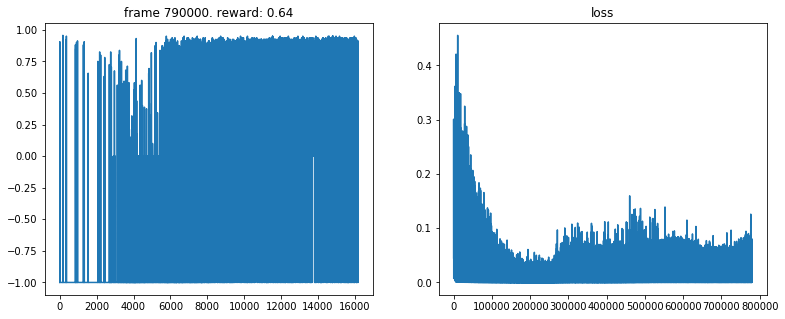

In [0]:
num_frames = 1400000
batch_size = 32
gamma      = 0.99

losses = []
all_rewards = []
episode_reward = 0

state = env.reset()['image']
state = reshape(7,7,state)
for frame_idx in range(1, num_frames + 1):

    epsilon = epsilon_by_frame(frame_idx)
    action = model.act(state, epsilon)

    
    next_state, reward, done, _ = env.step(action)

    #parse the state
    next_state = next_state['image']
    next_state = reshape(7,7,next_state)

    replay_buffer.push(state, action, reward, next_state, done)
    
    state = next_state
    episode_reward += reward
    if done:
        state = env.reset()['image']
        state = reshape(7,7,state)
        all_rewards.append(episode_reward)
        episode_reward = 0
        
    if len(replay_buffer) > replay_initial:
        loss = compute_td_loss(batch_size)
        losses.append(loss.data.item())
        
    if frame_idx % 10000 == 0:
        print(frame_idx)
        plot(frame_idx, all_rewards, losses)

        #320000 is a good point though

## 8*8

In [0]:
env_id_8 ="MiniGrid-Dynamic-Obstacles-8x8-v0"
env_8 = gym.make(env_id_8)

# number of input channel, I am trying to parse that myself since the third party package has no env.observation_space.shape attributes,
# which is used in the code provided by github
channel_value = env_8.observation_space.spaces
print(channel_value)
input_shape, num_actions = env_8.observation_space.spaces['image'].shape, env_8.action_space.n
input_shape=(input_shape[2],input_shape[0],input_shape[1])
print(input_shape)
model = CnnDQN(input_shape,num_actions)




num_frames = 1400000
batch_size = 32
gamma      = 0.99

losses = []
all_rewards = []
episode_reward = 0

state = env_8.reset()['image']
state = reshape(7,7,state)

for frame_idx in range(1, num_frames + 1):

    epsilon = epsilon_by_frame(frame_idx)
    action = model.act(state, epsilon)

    
    next_state, reward, done, _ = env.step(action)

    #parse the state
    next_state = next_state['image']
    next_state = reshape(7,7,next_state)

    replay_buffer.push(state, action, reward, next_state, done)
    
    state = next_state
    episode_reward += reward
    if done:
        state = env.reset()['image']
        state = reshape(7,7,state)
        all_rewards.append(episode_reward)
        episode_reward = 0
        
    if len(replay_buffer) > replay_initial:
        loss = compute_td_loss(batch_size)
        losses.append(loss.data.item())
        
    if frame_idx % 10000 == 0:
        print(frame_idx)
        plot(frame_idx, all_rewards, losses)

        #320000 is a good point though